In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tqdm import tqdm
from PIL import Image

In [2]:
# ! pip install kaggle

In [3]:

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

keep ur kaggle kaggle.json file in vscode-remote://ssh-remote%2B10.192.12.61/home/prashantc/.kaggle

In [4]:
# !kaggle datasets download -d alessiocorrado99/animals10 


In [5]:
# zip_file_path = '/home/jyotishr/PRNN_ASS_3/animals10.zip'

# # Create a directory to extract the files
# extract_dir = '/home/jyotishr/PRNN_ASS_3/Dataset'
# os.makedirs(extract_dir, exist_ok=True)

# # Extract files from the ZIP archive
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     for member in tqdm(zip_ref.infolist(), desc='Extracting files'):
#         zip_ref.extract(member, extract_dir)

In [6]:
def load_dataset(directory, image_size=(128, 128)):
    data = []
    labels = []
    label_mapping = {'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}

    for root, dirs, files in os.walk(directory):
        for file in tqdm(files):
            if file.endswith((".jpg", ".png" ,".jpeg")):
                image_path = os.path.join(root, file)
                label = os.path.basename(os.path.normpath(root))
                if label in label_mapping:
                    image = Image.open(image_path).convert('RGB')
                    image = image.resize(image_size)
                    image = np.array(image)
                    data.append(image)
                    labels.append(label_mapping[label])

    data = np.array(data)
    labels = np.array(labels)
    return data, labels


In [7]:
# Load the dataset
data_dir = '/home/jyotishr/PRNN_ASS_3/Dataset/raw-img'
data, labels = load_dataset(data_dir)

# Shuffle the data and labels together
# rng = np.random.RandomState(42)  # Set a (os, numpy, PIL, and tqdm) random seed for reproducibility
# permutation = rng.permutation(len(data))
# data = data[permutation]
# labels = labels[permutation]

# num_samples = len(data)
# train_ratio = 0.6
# val_ratio = 0.1
# test_ratio = 0.3

# # Calculate the sizes for each set
# train_size = int(num_samples * train_ratio)
# val_size = int(num_samples * val_ratio)
# test_size = num_samples - train_size - val_size

# # Split the data into train, validation, and test sets
# x_train, x_val, x_test = data[:train_size], data[train_size:train_size+val_size], data[train_size+val_size:]
# y_train, y_val, y_test = labels[:train_size], labels[train_size:train_size+val_size], labels[train_size+val_size:]


0it [00:00, ?it/s]
  0%|          | 0/1668 [00:00<?, ?it/s]

100%|██████████| 4863/4863 [00:10<00:00, 446.85it/s]


In [8]:
def balanced_split(x, y, test_size=0.3, val_size=0.1, random_state=None):
    # Find unique classes
    classes = np.unique(y)
    # Initialize arrays to hold indices for each class
    class_indices = {c: np.where(y == c)[0] for c in classes}
    
    # Split each class's indices into train, validation, and test sets
    train_indices = []
    val_indices = []
    test_indices = []
    for c in classes:
        indices = class_indices[c]
        np.random.seed(random_state)
        np.random.shuffle(indices)
        test_count = int(len(indices) * test_size)
        val_count = int(len(indices) * val_size)
        
        test_indices.extend(indices[:test_count])
        val_indices.extend(indices[test_count:test_count + val_count])
        train_indices.extend(indices[test_count + val_count:])
    
    # Shuffle the indices to mix the classes
    np.random.seed(random_state)
    np.random.shuffle(train_indices)
    np.random.shuffle(val_indices)
    np.random.shuffle(test_indices)
    
    # Use the indices to split the data
    x_train, y_train = x[train_indices], y[train_indices]
    x_val, y_val = x[val_indices], y[val_indices]
    x_test, y_test = x[test_indices], y[test_indices]
    
    return x_train, x_val, x_test, y_train, y_val, y_test

# Splitting data
x_train, x_val, x_test, y_train, y_val, y_test = balanced_split(data, labels)

# Printing the shapes of the datasets to verify the split
print("Train set:", x_train.shape, y_train.shape)
print("Validation set:", x_val.shape, y_val.shape)
print("Test set:", x_test.shape, y_test.shape)

Train set: (15717, 128, 128, 3) (15717,)
Validation set: (2614, 128, 128, 3) (2614,)
Test set: (7848, 128, 128, 3) (7848,)


In [9]:
x_train.shape

(15717, 128, 128, 3)

In [10]:
x_train = (x_train / 255.0) - 0.5
x_val = (x_val / 255.0) - 0.5
x_test = (x_test / 255.0) - 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


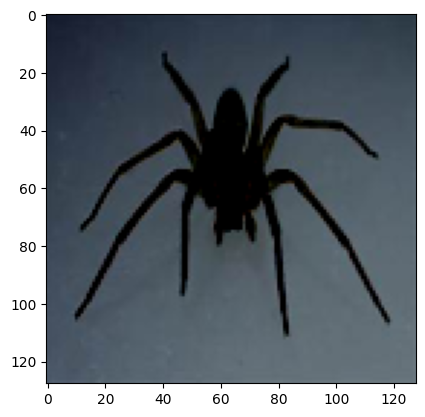

In [11]:
import matplotlib.pyplot as plt
f = x_train[3]
# Assuming data is a 128x128x3 array representing an image
plt.imshow(f,cmap='gray')
plt.show()


In [12]:
x_train = np.transpose(x_train, (0, 3, 1, 2))
x_test = np.transpose(x_test, (0, 3, 1, 2))
x_val = np.transpose(x_val, (0, 3, 1, 2))

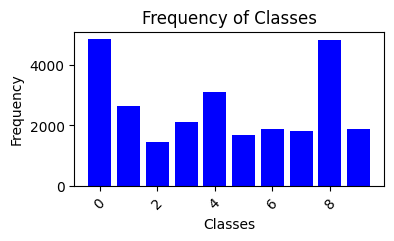

In [15]:
unique_classes, class_counts = np.unique(labels, return_counts=True)

# Plotting
plt.figure(figsize=(4, 2))
plt.bar(unique_classes, class_counts, color='blue')
plt.title('Frequency of Classes')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [16]:
class Neural_Network:

    def __init__(self, Network):
        self.Network = Network

    # forward pass
    def forward_pass(self, X):
        n = X
        for i in self.Network:
            n = i.forward_pass(n,saved_weights = None)
        return n

    #backward pass
    def backprop(self, Y):
        m = Y
        for i in (reversed(self.Network)):
            m = i.backprop(m)

    # applying sgd
    def applying_sgd(self):
        for i in self.Network:
            i.applying_sgd()

    # applying adam
    def applying_adam(self):
        for i in self.Network:
            i.applying_adam()

    # changing alpha
    def change_alpha(self):
        for i in self.Network:
            i.change_alpha()

    # saving weights
    def saving_params(self):
        for i,layer in enumerate(self.Network):
            layer.saving_params()

    # predicting after loading weights
    def predict(self,X):
        n = X
        for i in self.Network:
            n = i.forward_pass(n,saved_weights = 1)
        return n

In [17]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = None
        self.v = None
        self.t = 0

    def update(self, grads):
        if self.m is None:
            self.m = np.zeros_like(grads)
            self.v = np.zeros_like(grads)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * grads
        self.v = self.beta2 * self.v + (1 - self.beta2) * (grads ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        return self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

In [18]:
class accuracy:
    def __init__(self):
        pass

    def value(self, out, Y):
        self.out = np.argmax(out, axis=1)
        return np.mean(self.out == Y)

In [20]:
class reshaping:

    def __init__(self):
        pass

    def forward_pass(self, data, saved_weights = None):
        self.data_shape = data.shape

        self.flatten = data.reshape(self.data_shape[0], self.data_shape[1]*self.data_shape[2]*self.data_shape[3])
        # print(self.flatten.shape)
        return self.flatten

    def backprop(self, prev_data):
        return prev_data.reshape(self.data_shape[0], self.data_shape[1], self.data_shape[2], self.data_shape[3])

    def applying_sgd(self):
        pass

    def change_alpha(self):
        pass

    def applying_adam(self):
        pass

    def saving_params(self):
        pass

In [21]:
class cross_entropy:

    def _init_(self):
        pass

    def loss(self, A, Y):

        epsilon = 1e-15  # Small value to prevent division by zero

        # Compute cross-entropy loss
        m = Y.shape[0]  # Number of examples
        ce_loss = -np.sum(np.log(A[np.arange(m), Y] + epsilon)) / m

        return ce_loss

In [22]:
class softmax:

    def __init__(self):
        pass

    def expansion(self, actual_pred):
        d = actual_pred.shape[0]
        one_hot_pred = np.zeros((d,self.n_classes))
        for i in range(0,d):
            one_hot_pred[i,actual_pred[i]] = 1
        return one_hot_pred

    def forward_pass(self, z, saved_weights = None):

        self.n_classes = z.shape[1]
        # vectorised form below
        shiftx = z - np.max(z, axis=1, keepdims=True)

        # Exponentiate the shifted values
        exps = np.exp(shiftx)

        # Calculate softmax probabilities
        self.softmax_probs = exps / np.sum(exps, axis=1, keepdims=True)

        return self.softmax_probs

        # self.a = np.zeros_like(z)
        # """Compute the softmax of vector x in a numerically stable way."""
        # for i,x in enumerate(z):
        #   shiftx = x - np.max(x)
        #   exps = np.exp(shiftx)
        #   self.a[i] = exps / np.sum(exps)
        # return self.a

    def backprop(self, Y):
        y = self.expansion(Y)
        self.grad = (self.softmax_probs - y)
        # print("soft")
        # print(self.grad[0][0])
        return self.grad


    def applying_sgd(self):
        pass

    def change_alpha(self):
        pass

    def applying_adam(self):
        pass

    def saving_params(self):
        pass

In [23]:
class relu:
    def __init__(self):
        pass

    def forward_pass(self, z, saved_weights = None):
        self.z = z
        return np.maximum(0, z)

    def derivative(self, a):
        return np.where(a > 0, 1, 0)

    def backprop(self, grad_previous):
        # print("relu")
        
        # print(self.z[0,0,0,0],(grad_previous * self.derivative(self.z))[0,0,0,0])
        return grad_previous * self.derivative(self.z)

    def applying_sgd(self):
        pass

    def change_alpha(self):
        pass

    def applying_adam(self):
        pass

    def saving_params(self):
        pass

In [24]:
class pooling:
    def __init__(self, pool_size=(2, 2), strides=None):
        self.pool_height, self.pool_width = pool_size
        if strides is None:
            self.strides = pool_size
        else:
            self.strides = strides

    def forward_pass(self, input_data, saved_weights = None):
        self.input_data = input_data
        self.input_data_shape = input_data.shape
        batch_size, input_channels, input_height, input_width = input_data.shape
        output_height = (input_height - self.pool_height) // self.strides[0] + 1
        output_width = (input_width - self.pool_width) // self.strides[1] + 1
        self.output = np.zeros((batch_size, input_channels, output_height, output_width))

        for i in range(output_height):
            for j in range(output_width):
                self.output[:,:, i, j] = np.max(input_data[:, :, i*self.strides[0]:i*self.strides[0]+self.pool_height,
                                            j*self.strides[1]:j*self.strides[1]+self.pool_width],axis = (2,3))

        return self.output
    
    def backprop(self, grad_previous):
        batch_size, input_channels, output_height, output_width = grad_previous.shape
        grad_back = np.zeros(self.input_data_shape)

        for i in range(self.output.shape[2]):
          for j in range(self.output.shape[3]):

            x_start = i*self.strides[0]
            x_end = x_start + self.pool_height
            y_start = j * self.strides[1]
            y_end = y_start + self.pool_width
            grad_back[:, :, x_start:x_end,y_start:y_end] = np.where(self.input_data[:, :, x_start:x_end,y_start:y_end] >= (self.output[:,:,i,j])[:,:,np.newaxis, np.newaxis],(grad_previous[:,:, i, j])[:,:,np.newaxis, np.newaxis],0)

        # print("pool")
        # print(grad_back[0,0,0,0])
        return grad_back

    def applying_sgd(self):
        pass

    def change_alpha(self):
        pass

    def applying_adam(self):
        pass

    def saving_params(self):
        pass



In [25]:
class Linear_Layer:

    def __init__(self, in_dim, out_dim, alpha = 0.01,index = 0,reg = None, reg_penelty = 0):
        self.Theta = np.random.randn(in_dim, out_dim)/(in_dim * out_dim)
        self.bias = np.zeros((out_dim,))
        self.optimizer_theta = Adam(lr = alpha)
        self.optimizer_bias = Adam(lr = alpha)
        self.alpha = alpha
        self.index = index
        self.reg = reg
        self.reg_penelty = reg_penelty


    def forward_pass(self, X, saved_weights = None):
        if saved_weights != None:
          saved_data = np.load(f'/content/drive/MyDrive/Colab Notebooks/Saved_Models/Linear_layer{self.index}.npz')
          self.Theta =  saved_data['arr1']
          self.bias = saved_data['arr2']

        self.X = X
        # print(self.X.shape)
        self.z = np.dot(X,self.Theta) + self.bias
        return self.z


    def backprop(self, grad_previous):
        t= self.X.shape[0]
        self.grad_theta = np.matmul((self.X.transpose()), grad_previous)
        self.grad_bias = (grad_previous.sum(axis=0))/t
        self.grad_back = np.matmul(grad_previous, self.Theta.transpose())

        # Add L1 and L2 and elastic regularization terms
        if self.reg == 'l1':
          self.grad_theta += self.reg_penelty * np.sign(self.Theta)
          self.grad_bias += self.reg_penelty * np.sign(self.bias)

        elif self.reg == 'l2':
          self.grad_theta += 2 * self.reg_penelty * self.Theta
          self.grad_bias += 2 * self.reg_penelty * self.bias

        elif self.reg == 'elastic':
          self.grad_theta += self.reg_penelty * (0.5 * np.sign(self.Theta) + 0.5 * self.Theta)
          self.grad_bias += self.reg_penelty * (0.5 * np.sign(self.bias) + 0.5 * self.bias)
        # print('Linear_Layer')
        # print(self.grad_back[0])
        return self.grad_back

    def applying_sgd(self):
        self.Theta = self.Theta - (self.alpha*self.grad_theta)
        self.bias = self.bias - (self.alpha*self.grad_bias)

    def applying_adam(self):
        self.Theta -= self.optimizer_theta.update(self.grad_theta)
        self.bias -= self.optimizer_bias.update(self.grad_bias)

    def change_alpha(self):
        self.alpha = self.alpha/5

    def saving_params(self):
        np.savez(f'/content/drive/MyDrive/Colab Notebooks/Saved_Models/Linear_layer{self.index}.npz',arr1 = self.Theta, arr2 = self.bias)


In [96]:
# import numpy as np

# a = np.ones((10, 5, 26, 26))
# b = np.ones((10,3,28,28))
# e = np.ones((5,3,3,3))

# dimen = int(((b.shape[2] - 3)/1) + 1)

# for f in range(5):
#   for c in range(b.shape[1]):
#     for i in range(0, b.shape[2] - dimen + 1, 1):
#         for j in range(0, b.shape[3] - dimen + 1, 1):
#             print(np.sum(a[:,f,:,:] * b[:,c,i:i+dimen,j:j+dimen]))

#           # e[f,c,i,j] = 
                

# print(e)

# # b_reshaped = b[:, :, np.newaxis]

# # # Get the shape of 'a' excluding the last two dimensions
# # a_shape = a.shape[:-2]

# # for i in range(a_shape[2]):
# #     for j in range(a_shape[3]):
# #         a[:, :, i, j] = b_reshaped[:, :, 0]

# # print(a)


In [26]:
class Convolutional_Layer:
    def __init__(self, filter_dim = 3, stride = 1, pad = 0, alpha=0.01, num_of_filters = 1,inp_chanels = 3, reg = None,reg_penelty = 0):
        self.filter_dim = filter_dim
        self.inp_chanels = inp_chanels
        self.n_filters = num_of_filters
        self.stride = stride
        self.bias = np.random.randn(self.n_filters, 1) / self.n_filters
        self.filter = np.random.randn(self.n_filters, self.inp_chanels, self.filter_dim, self.filter_dim)/((self.filter_dim ** 2) * self.inp_chanels)
        self.pad = pad
        self.alpha = alpha
        self.optimizer_bias = Adam(lr = alpha)
        self.optimizer_filter = Adam(lr = alpha)
        self.reg_penelty = reg_penelty
        self.reg = reg

    def convolving(self, dimen_x, dimen_y):
        p = self.X.shape[2]
        q = self.X.shape[3]
        z = np.zeros((self.X.shape[0],self.n_filters, dimen_x, dimen_y))
        for i in range(0, p - self.filter_dim + 1, self.stride):
              for j in range(0, q - self.filter_dim + 1, self.stride):
                  temp = np.multiply(self.X[:, np.newaxis, :, i:i+self.filter_dim, j:j+self.filter_dim], self.filter)
                  # print("Inside loop conv")
                  # print(temp[0,0,0,0,0])
                  z[:,:,i,j] = np.sum(temp,axis=(2,3,4)) + self.bias[:,0]
        
        # print("Out conv")
        # print(z[0,0,0,0])          
        return z


    def forward_pass(self, X, saved_weights = None):
        if saved_weights != None:
          saved_data = np.load('/content/drive/MyDrive/Colab Notebooks/Saved_Models/conv2d.npz')
          self.filter = saved_data['arr1']
          self.bias = saved_data['arr2']

        self.X = np.pad(X , ((0, 0), (0, 0), (self.pad, self.pad), (self.pad, self.pad)),'constant', constant_values=0)
        (d, c, p, t) = self.X.shape
        dimen_x = int(((p - self.filter_dim)/self.stride) + 1)
        dimen_y = int(((t - self.filter_dim)/self.stride) + 1)
        self.z = np.zeros((d, self.n_filters, dimen_x, dimen_y))
        self.z = self.convolving(dimen_x, dimen_y)
        # print(self.z.shape)
        # print("forward_conv")
        # print(self.z[0,0,0,0])
        return self.z

    def backprop(self, grad_z):
        (d, f, p, t) = grad_z.shape
        # print("grad_z")
        # print(grad_z[0,0,0,0])
        dimen_x = int(((self.X.shape[2] - self.filter_dim)/self.stride) + 1)
        dimen_y = int(((self.X.shape[3] - self.filter_dim)/self.stride) + 1)
        self.grads = np.zeros((d, p, t))

        self.grad_filter = np.zeros((self.n_filters, self.inp_chanels, self.filter_dim, self.filter_dim))
        grad_z = np.pad(grad_z, ((0,0),(0,0),(self.pad,self.pad),(self.pad,self.pad)), 'constant', constant_values = 0)

        # for f in range(self.n_filters):
        # # Iterate over each channel
        #   for c in range(self.X.shape[1]):
        #       # Extract the relevant portions of X and grad_z for this filter and channel
        #       X_slice = self.X[:, c, :, :]
        #       grad_z_slice = grad_z[:, f, :, :]
              
        #       # Compute the convolution
        #       conv_grad = np.zeros_like(self.grad_filter[f, c, :, :])
        #       for i in range(0, self.X.shape[2] - dimen_x + 1, self.stride):
        #           for j in range(0, self.X.shape[3] - dimen_y + 1, self.stride):
        #               conv_grad[i, j] = np.sum(grad_z_slice * X_slice[:, i:i+dimen_x, j:j+dimen_y])
              
        #       # Assign the computed gradients to the corresponding filter
        #       self.grad_filter[f, c, :, :] = conv_grad
        


        for f in range(grad_z.shape[1]):
          for c in range(self.X.shape[1]):
            for i in range(0, self.X.shape[2] - dimen_x + 1, self.stride):
                for j in range(0, self.X.shape[3] - dimen_y + 1, self.stride):
                  # print("inside")
                  # print(grad_z[0,0,0,0],self.X[0,0,0,0])
                  # print(np.sum(grad_z[:,f,:,:] * self.X[:,c,i:i+dimen_x,j:j+dimen_y]))
                  self.grad_filter[f,c,i,j] = np.sum(grad_z[:,f,:,:] * self.X[:,c,i:i+dimen_x,j:j+dimen_y])
        # print("HHHH")
        # print(self.grad_filter[0,0,0,0])
        self.grad_filter = self.grad_filter /(grad_z.shape[0] * grad_z.shape[2]*grad_z.shape[3])

        self.grad_bias = np.zeros_like(self.bias)

        for k in range(self.n_filters):
          self.grad_bias[k] = (grad_z[:,k].sum()) /(grad_z.shape[0] * grad_z.shape[2]*grad_z.shape[3])

        # Add L1 and L2 and elastic regularization terms
        if self.reg == 'l1':
          self.grad_filter += self.reg_penelty * np.sign(self.filter)
          self.grad_bias += self.reg_penelty * np.sign(self.bias)

        elif self.reg == 'l2':
          self.grad_filter += 2 * self.reg_penelty * self.filter
          self.grad_bias += 2 * self.reg_penelty * self.bias

        elif self.reg == 'elastic':
          self.grad_filter += self.reg_penelty * (0.5 * np.sign(self.filter) + 0.5 * self.filter)
          self.grad_bias += self.reg_penelty * (0.5 * np.sign(self.bias) + 0.5 * self.bias)

        return self.grads

    def applying_sgd(self):
        self.filter = self.filter - (self.alpha*self.grad_filter)
        self.bias = self.bias - (self.alpha*self.grad_bias)

    def applying_adam(self):
        self.filter -= self.optimizer_bias.update(self.grad_filter)
        self.bias -= self.optimizer_filter.update(self.grad_bias)

    def change_alpha(self):
        self.alpha = self.alpha/5

    def saving_params(self):
        np.savez('/content/drive/MyDrive/Colab Notebooks/Saved_Models/conv2d.npz',arr1 = self.filter,arr2 = self.bias )

In [117]:
# class Convolutional_Layer:
#     def __init__(self, filter_dim = 3, stride = 1, pad = 0, alpha=0.01, num_of_filters = 1,reg = None,reg_penelty = 0):
#         self.filter_dim = filter_dim
#         self.n_filters = num_of_filters
#         self.stride = stride
#         self.bias = np.random.randn(self.n_filters, 1) / self.n_filters
#         self.filter = np.random.randn(self.n_filters, self.filter_dim, self.filter_dim)/(self.filter_dim ** 2)
#         self.pad = pad
#         self.alpha = alpha
#         self.optimizer_bias = Adam(lr = alpha)
#         self.optimizer_filter = Adam(lr = alpha)
#         self.reg_penelty = reg_penelty
#         self.reg = reg

#     def convolving(self, dimen_x, dimen_y):
#         p = self.X.shape[1]
#         q = self.X.shape[2]
#         z = np.zeros((self.X.shape[0],self.n_filters, dimen_x, dimen_y))
#         for i in range(0, p - self.filter_dim + 1, self.stride):
#               for j in range(0, q - self.filter_dim + 1, self.stride):
#                   temp = np.multiply(self.X[:, np.newaxis,i : i+self.filter_dim, j : j+self.filter_dim], self.filter[ np.newaxis,:, :, :])
#                   z[:,:,i//self.stride,j//self.stride] = np.sum(temp,axis=(2,3)) + self.bias[:,0]
#         return z


#     def forward_pass(self, X, saved_weights = None):
#         if saved_weights != None:
#           saved_data = np.load('/content/drive/MyDrive/Colab Notebooks/Saved_Models/conv2d.npz')
#           self.filter = saved_data['arr1']
#           self.bias = saved_data['arr2']

#         self.X = np.pad(X , ((0, 0), (self.pad, self.pad), (self.pad, self.pad)),'constant', constant_values=0)
#         (d, p, t) = self.X.shape
#         dimen_x = int(((p - self.filter_dim)//self.stride) + 1)
#         dimen_y = int(((t - self.filter_dim)//self.stride) + 1)
#         self.z = np.zeros((d, self.n_filters, dimen_x, dimen_y))
#         self.z = self.convolving(dimen_x, dimen_y)

#         return self.z

#     def backprop(self, grad_z):
#         (d, f, p, t) = grad_z.shape

#         self.grads = np.zeros((d, p, t))
#         # for i in range(d):
#         #   for k in range(self.n_filters):
#         #     filter_1 = np.flip((np.flip(self.filter[k], axis = 0)), axis = 1)
#         #     self.grads[i] += self.convolving(np.pad(grad_z[i,k], ((1,1), (1,1)), 'constant', constant_values = 0), filter_1, p, t)

#         # self.grads /= self.n_filters
#         # self.grads = np.pad(self.grads, ((0,0),(1,1),(1,1)), 'constant', constant_values = 0)

#         self.grad_filter = np.zeros((self.n_filters, self.filter_dim, self.filter_dim))
#         grad_z = np.pad(grad_z, ((0,0),(0,0),(self.pad,self.pad),(self.pad,self.pad)), 'constant', constant_values = 0)

#         for i in range(self.filter_dim):
#               for ii in range(self.filter_dim):
#                   self.grad_filter[:, i, ii] = np.sum(np.multiply(grad_z[:,:,:,:], self.X[:,  np.newaxis, i:p+i, ii:t+ii]),axis =(0,2,3) )
#         self.grad_filter = self.grad_filter /(grad_z.shape[0] * grad_z.shape[2]*grad_z.shape[3])

#         self.grad_bias = np.zeros_like(self.bias)

#         for k in range(self.n_filters):
#           self.grad_bias[k] = (grad_z[:,k].sum()) /(grad_z.shape[0] * grad_z.shape[2]*grad_z.shape[3])

#         # Add L1 and L2 and elastic regularization terms
#         if self.reg == 'l1':
#           self.grad_filter += self.reg_penelty * np.sign(self.filter)
#           self.grad_bias += self.reg_penelty * np.sign(self.bias)

#         elif self.reg == 'l2':
#           self.grad_filter += 2 * self.reg_penelty * self.filter
#           self.grad_bias += 2 * self.reg_penelty * self.bias

#         elif self.reg == 'elastic':
#           self.grad_filter += self.reg_penelty * (0.5 * np.sign(self.filter) + 0.5 * self.filter)
#           self.grad_bias += self.reg_penelty * (0.5 * np.sign(self.bias) + 0.5 * self.bias)

#         return self.grads

#     def applying_sgd(self):
#         self.filter = self.filter - (self.alpha*self.grad_filter)
#         self.bias = self.bias - (self.alpha*self.grad_bias)

#     def applying_adam(self):
#         self.filter -= self.optimizer_bias.update(self.grad_filter)
#         self.bias -= self.optimizer_filter.update(self.grad_bias)

#     def change_alpha(self):
#         self.alpha = self.alpha/5

#     def saving_params(self):
#         np.savez('/content/drive/MyDrive/Colab Notebooks/Saved_Models/conv2d.npz',arr1 = self.filter,arr2 = self.bias )


In [123]:
# import cupy as np
# %pip install cupy

In [28]:
X_testing = x_train
Y_testing = y_train

al = 0.001

train_loss = []
val_loss = []

complete_NN = Neural_Network([
                                Convolutional_Layer(alpha = al,num_of_filters = 16,pad = 0,filter_dim = 5,stride  = 1),
                                relu(),
                                pooling(),
                                reshaping(),
                                Linear_Layer(61504, 10, alpha = al,index = 0),
                                softmax()
                                ])
CE = cross_entropy()

acc = accuracy()
epochs = 3
batch_size = 1500
done = 0
for i in range(epochs):
    for batch in range(0, X_testing.shape[0], batch_size):
        out = complete_NN.forward_pass(X_testing[batch:batch + batch_size])
        print("epoch:{} \t batch: {} \t ".format(i+1, 1 + (batch//batch_size)), end="\t")
        # train_loss.append(CE.loss(out, Y_testing[batch:batch + batch_size]))
        accuracy_val = acc.value(out, Y_testing[batch:batch + batch_size])*100
        print("accuracy: {}".format(accuracy_val))

        complete_NN.backprop(Y_testing[batch:batch + batch_size])
        # complete_NN.applying_sgd()
        complete_NN.applying_adam()

        
    out_train = complete_NN.forward_pass(X_testing)
    print("Training_epoch:{} \t ".format(i+1), end="\t")
    train_loss.append(CE.loss(out_train, Y_testing))
    accuracy_train = acc.value(out_train, Y_testing)*100
    print("Train_accuracy: {}".format(accuracy_train))
    
    out_val = complete_NN.forward_pass(x_val)
    print("Validation_epoch:{} \t ".format(i+1), end="\t")
    val_loss.append(CE.loss(out_val, y_val))
    accuracy_val = acc.value(out_val, y_val)*100
    print("val_accuracy: {}".format(accuracy_val))
    


epoch:1 	 batch: 1 	 	accuracy: 16.733333333333334
epoch:1 	 batch: 2 	 	accuracy: 23.866666666666667
epoch:1 	 batch: 3 	 	accuracy: 16.8
epoch:1 	 batch: 4 	 	accuracy: 24.2
epoch:1 	 batch: 5 	 	accuracy: 10.4
epoch:1 	 batch: 6 	 	accuracy: 18.46666666666667
epoch:1 	 batch: 7 	 	accuracy: 24.4
epoch:1 	 batch: 8 	 	accuracy: 25.4
epoch:1 	 batch: 9 	 	accuracy: 24.333333333333336
epoch:1 	 batch: 10 	 	accuracy: 25.466666666666665
epoch:1 	 batch: 11 	 	accuracy: 22.315202231520225
Training_epoch:1 	 	Train_accuracy: 26.18820385569765
Validation_epoch:1 	 	val_accuracy: 25.63121652639633
epoch:2 	 batch: 1 	 	accuracy: 27.200000000000003
epoch:2 	 batch: 2 	 	accuracy: 23.466666666666665
epoch:2 	 batch: 3 	 	accuracy: 24.066666666666666
epoch:2 	 batch: 4 	 	accuracy: 27.200000000000003
epoch:2 	 batch: 5 	 	accuracy: 30.266666666666666
epoch:2 	 batch: 6 	 	accuracy: 30.933333333333334
epoch:2 	 batch: 7 	 	accuracy: 29.733333333333334
epoch:2 	 batch: 8 	 	accuracy: 29.86666666

In [29]:
out_test = complete_NN.forward_pass(x_test)
print("The accuracy on test set is {}".format(acc.value(out_test, y_test)*100))

The accuracy on test set is 37.869520897043834


In [32]:
val_loss

[2.110478302642857, 1.9284683720782587, 1.7869936911390611]

In [33]:
train_loss

[2.094034301404596, 1.9005086589824365, 1.7242106263519852]

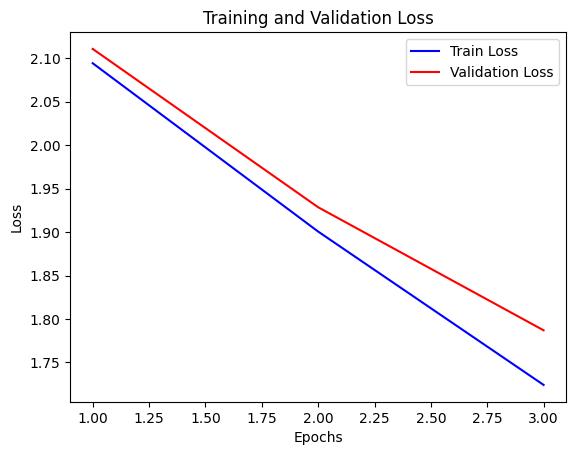

In [40]:
epochs_list = range(1, len(train_loss) + 1)

# Plotting
plt.plot(epochs_list, train_loss, 'b', label='Train Loss')
plt.plot(epochs_list, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
predicted = np.argmax(out_test,axis = 1)
predicted

array([0, 0, 7, ..., 8, 0, 8])

CONFUSION MATRIX

In [34]:
def confusion_matrix(predicted,actual,n_classes):
  conf_mat = np.zeros((n_classes, n_classes))
  for i in range(len(predicted)):
    conf_mat[int(actual[i])][int(predicted[i])] = conf_mat[int(actual[i])][int(predicted[i])] + 1

  return conf_mat

In [43]:
n_classes = np.unique(y_train).shape[0]

print(confusion_matrix(predicted,y_test,n_classes))

[[742.  82.   3.   9. 136.  35.  29.  81. 327.  14.]
 [168. 314.   0.   2.  92.   1.  78.  28.  98.   5.]
 [126.  97.  17.   0.  65.   4.  20.  16.  80.   8.]
 [ 89.   8.   0. 151.  43.  15.   9.  22. 292.   4.]
 [232.  23.   1.  12. 413.  10.  16.  45. 167.  10.]
 [236.   7.   1.   3.  41.  33.   5.  10. 158.   6.]
 [111.  87.   1.   1.  57.   0. 146.  68.  85.   3.]
 [143.  35.   3.   1.  61.   5.  50. 134. 107.   7.]
 [234.   8.   1.  16. 157.  11.  15.  18. 980.   6.]
 [172.   8.   1.   3. 101.   5.   5.   7. 214.  42.]]


F1 score

In [44]:
def f1_score(predicted,actual,n_classes):
  conf_mat = confusion_matrix(predicted,actual,n_classes)
  f1_score = np.zeros(n_classes)
  for i in range(n_classes):
    tp = conf_mat[i][i]
    fn = sum([conf_mat[k][i] for k in range(n_classes)]) - tp
    fp = np.sum(conf_mat[i]) -tp
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score[i] = 2 * (precision * recall) / (precision + recall)

  return f1_score


In [45]:
print(f1_score(predicted,y_test,n_classes))

[0.39989221 0.43161512 0.07375271 0.36341757 0.39427208 0.10662359
 0.31330472 0.27487179 0.49570056 0.12669683]
